In [1]:
# Importando bibliotecas
import pandas as pd
import statistics as sts
import seaborn as sns

In [3]:
# Importando dados
dataset = pd.read_csv('../csv/clima_nivel25.csv')

# Vendo head
dataset.head()

,Cidade,Temperatura,Umidade,Chuva,Vento
0,São Paulo,25,80.0,sim,forte
1,Rio,200,50.0,não,fraco
2,BH,22,-10.0,choveu,NaN
3,Curitiba,18,90.0,seco,moderado
4,Recife,30,105.0,não,F


### Duplicatas

In [6]:
# Verificando se existem Cidades duplicadas
dataset.duplicated(subset=["Cidade"]).sum()

2

In [ ]:
# Dropando valore duplicado e mantendo o primeiro
dataset.drop_duplicates(subset=["Cidade"], keep="first", inplace=True)

### Temperaturas

Text(0.5, 1.0, 'Temperatura')

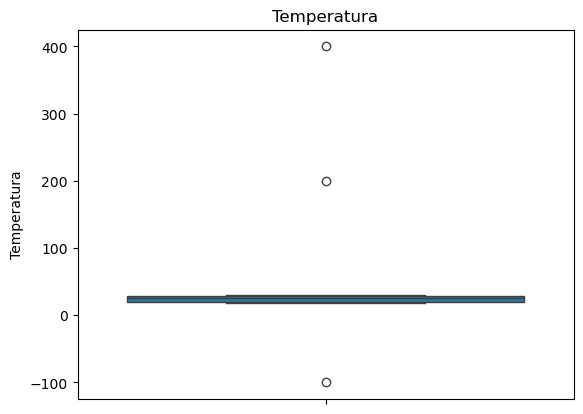

In [11]:
# Criando boxplot para analisar
sns.boxplot(dataset["Temperatura"]).set_title("Temperatura")

In [13]:
# Vendo as temperaturas que estão fora do padrão
dataset.loc[(dataset["Temperatura"] < -5)|(dataset["Temperatura"] > 35)]

,Cidade,Temperatura,Umidade,Chuva,Vento
1,Rio,200,50.0,não,fraco
5,Salvador,-100,70.0,sim,m
10,Goiânia,400,30.0,Sim,fraco


- Temperaturas absurdas para o clima do Brasil
- Substituir pela mediana

In [14]:
# Pegando a mediana das temperaturas
mediana = sts.median(dataset["Temperatura"])
mediana

25.5

In [16]:
# Substituindo temperaturas pela mediana
dataset.loc[(dataset["Temperatura"] < -5)|(dataset["Temperatura"] > 35), "Temperatura"] = mediana

In [18]:
# Conferindo se os valores foram trocados
dataset.loc[(dataset["Temperatura"] < -5)|(dataset["Temperatura"] > 35)]

,Cidade,Temperatura,Umidade,Chuva,Vento


### Umidade

Text(0.5, 1.0, 'Umidade')

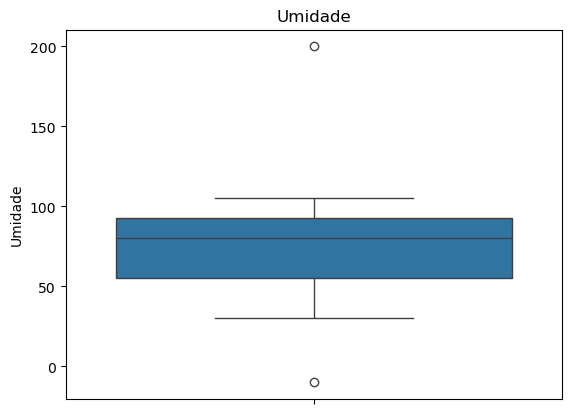

In [21]:
# Gerando um gráfico em barras para ver tem valores acima de 100 ou menores que 0
sns.boxplot(dataset["Umidade"]).set_title("Umidade")

In [22]:
# Analisando os valores fora de indice
dataset.loc[(dataset["Umidade"] < 0)|(dataset["Umidade"] > 100)]

,Cidade,Temperatura,Umidade,Chuva,Vento
2,BH,22.0,-10.0,choveu,NaN
4,Recife,30.0,105.0,não,F
11,Natal,26.0,200.0,não,Moderado


- Valores fora de indice
- Corrigir valores substituindo pela mediana

In [25]:
# Pegando a mediana dos valores
mediana = sts.median(dataset["Umidade"])
mediana

82.5

In [26]:
# Substituindo
dataset.loc[(dataset["Umidade"] < 0)|(dataset["Umidade"] > 100), "Umidade"] = mediana

In [28]:
# Conferindo
dataset.loc[(dataset["Umidade"] < 0)|(dataset["Umidade"] > 100)]

,Cidade,Temperatura,Umidade,Chuva,Vento


### Chuva

Text(0.5, 1.0, 'Chuva')

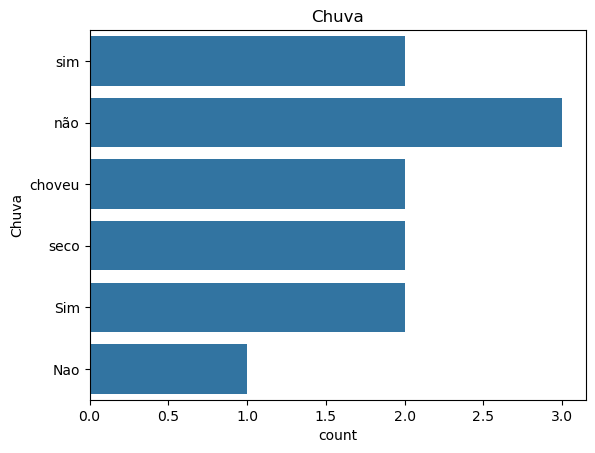

In [ ]:
# Criando um countplot para analisar os dados
sns.countplot(dataset["Chuva"]).set_title("Chuva")

- Existem mais tipos de grupos além de Sim ou Não

In [32]:
# Vendo os grupos
agrupado = dataset.groupby(["Chuva"]).size()
agrupado

Chuva
Nao       1
Sim       2
choveu    2
não       3
seco      2
sim       2
dtype: int64

In [33]:
# Padronizando os grupos
dataset.loc[dataset["Chuva"].isin(["Nao","não"]), "Chuva"] = "Não"
dataset.loc[dataset["Chuva"].isin(["sim"]), "Chuva"] = "Sim"

In [35]:
# Pegando a moda para trocar os grupos
moda = sts.mode(dataset["Chuva"])
moda

'Sim'

In [38]:
# Preenchendo grupos errados com a moda
dataset.loc[dataset["Chuva"].isin(["choveu", "seco"]), "Chuva"] = moda

### Vendo se tem valores nulos (esqueci)

In [39]:
dataset.isnull().sum()

Cidade         0
Temperatura    0
Umidade        1
Chuva          0
Vento          1
dtype: int64

In [41]:
# Pegando a mediana da Umidade e trocando o valor nulo
mediana = sts.median(dataset["Umidade"])
mediana

82.5

In [44]:
# Substituindo valor nulo
dataset.fillna({"Umidade":mediana}, inplace=True)

### Vento

Text(0.5, 1.0, 'Vento')

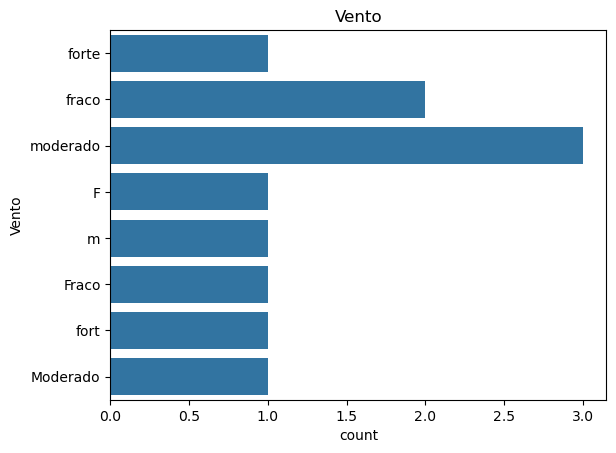

In [45]:
# Montando um countplot para o "Vento"
sns.countplot(dataset["Vento"]).set_title("Vento")

Grupos sem padronização, padronizar grupos


In [47]:
# Padronizando
dataset.loc[dataset["Vento"].isin(["forte","F","fort"]), "Vento"] = "Forte"
dataset.loc[dataset["Vento"].isin(["moderado","m"]), "Vento"] = "Moderado"
dataset.loc[dataset["Vento"] == "fraco", "Vento"] = "Fraco"

In [49]:
# Analisando pra ver se ainda tem grupos fora do padrão
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
Forte       3
Fraco       3
Moderado    5
dtype: int64